In [1]:
# Визуализация простой нейронной сети
# Зелёным цветом обозначены входные нейроны: это нейроны первого слоя, которые принимают исходные данные.
# Голубым цветом обозначены скрытые нейроны: это нейроны внутренних слоев, которые обрабатывают данные, применяя веса и смещения.
# Жёлтым цветом обозначен выходной нейрон: это нейроны последнего слоя, которые выдают конечный результат работы сети.
# Стрелки указывают на вход и выход нейросети: они демонстрируют направление потока данных в сети, от входа к выходу.
# Каждый нейрон связан с нейронами следующего слоя, что отражает передачу и обработку данных внутри сети.

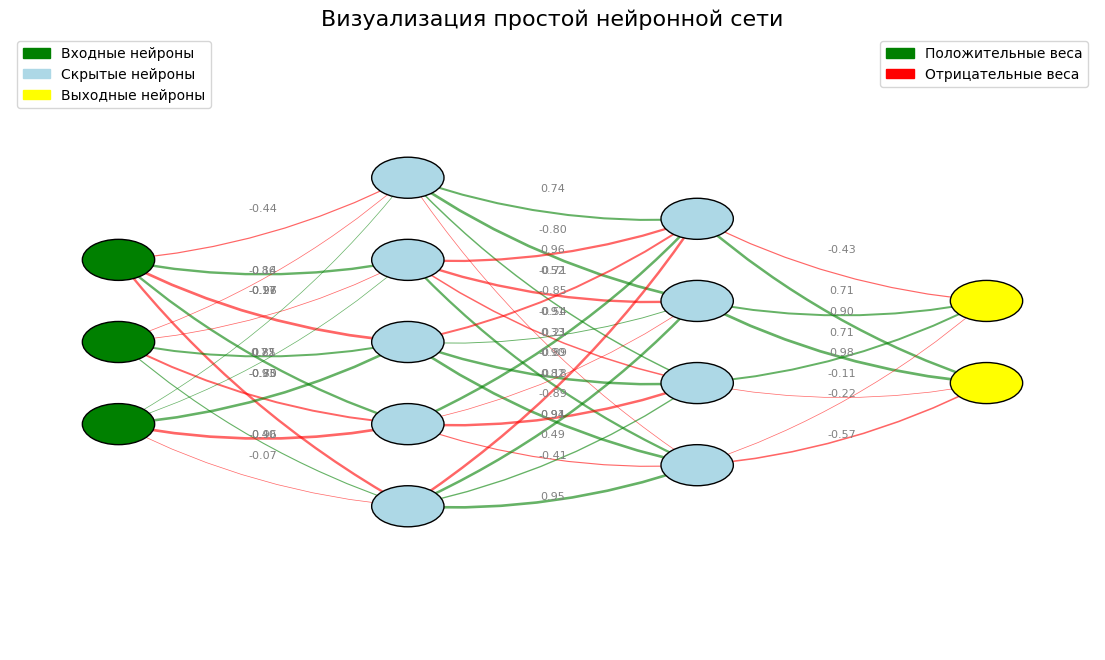

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyArrowPatch
import numpy as np

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, weights=None):
    '''
    Рисует схематическое изображение нейронной сети.

    :param ax: экземпляр matplotlib.axes.Axes
    :param left, right, bottom, top: координаты для рисования
    :param layer_sizes: список размеров слоев (количество нейронов в каждом слое)
    :param weights: (опционально) матрица весов между слоями для визуализации
    '''
    v_spacing = (top - bottom) / float(max(layer_sizes) + 1)
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Рисование нейронов
    neuron_positions = []
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        layer_positions = []
        for m in range(layer_size):
            x = n * h_spacing + left
            y = layer_top - m * v_spacing
            if n == 0:
                color = 'green'  # Входные нейроны
            elif n == len(layer_sizes) - 1:
                color = 'yellow'  # Выходные нейроны
            else:
                color = 'lightblue'  # Скрытые нейроны
            circle = plt.Circle((x, y), v_spacing / 4., color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            # Нумерация нейронов
            ax.text(x, y, f"N{m+1}", fontsize=10, ha='center', va='center')
            layer_positions.append((x, y))
        neuron_positions.append(layer_positions)

    # Рисование соединений
    connection_patches = []
    label_offsets = {}  # Словарь для хранения смещений надписей весов

    if weights is not None:
        for n, (layer_a, layer_b) in enumerate(zip(neuron_positions[:-1], neuron_positions[1:])):
            # Инициализируем счётчик для смещения надписей весов
            label_offsets[n] = 0
            for m, (x_a, y_a) in enumerate(layer_a):
                for o, (x_b, y_b) in enumerate(layer_b):
                    weight = weights[n][m][o]
                    # Настройка толщины и цвета линии в зависимости от веса
                    line_width = max(0.5, abs(weight) * 2)
                    line_color = 'green' if weight > 0 else 'red'
                    connection = FancyArrowPatch(
                        (x_a, y_a), (x_b, y_b),
                        connectionstyle="arc3,rad=0.1",
                        arrowstyle='-', linewidth=line_width, color=line_color, alpha=0.6
                    )
                    ax.add_patch(connection)
                    connection_patches.append(connection)
                    # Добавление текста веса с чередованием смещения
                    mid_x = (x_a + x_b) / 2
                    mid_y = (y_a + y_b) / 2
                    # Определяем смещение для текущей надписи
                    delta = v_spacing / 8
                    if label_offsets[n] % 2 == 0:
                        label_y = mid_y + delta
                    else:
                        label_y = mid_y - delta
                    label_offsets[n] += 1
                    ax.text(mid_x, label_y, f"{weight:.2f}", color='gray', fontsize=8, ha='center', va='center')
    else:
        for n, (layer_a, layer_b) in enumerate(zip(neuron_positions[:-1], neuron_positions[1:])):
            for m, (x_a, y_a) in enumerate(layer_a):
                for o, (x_b, y_b) in enumerate(layer_b):
                    line = plt.Line2D([x_a, x_b], [y_a, y_b], c='k', alpha=0.3)
                    ax.add_artist(line)

    # Добавление стрелок для входа и выхода
    ax.annotate('Вход',
                xy=(left - h_spacing / 2, (top + bottom) / 2),
                xytext=(left - h_spacing, (top + bottom) / 2),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                ha='center', va='center')
    ax.annotate('Выход',
                xy=(right + h_spacing / 2, (top + bottom) / 2),
                xytext=(right + h_spacing, (top + bottom) / 2),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                ha='center', va='center')

    # Добавление легенды для нейронов
    input_patch = mpatches.Patch(color='green', label='Входные нейроны')
    hidden_patch = mpatches.Patch(color='lightblue', label='Скрытые нейроны')
    output_patch = mpatches.Patch(color='yellow', label='Выходные нейроны')

    # Добавление легенды для соединений
    positive_patch = mpatches.Patch(color='green', label='Положительные веса')
    negative_patch = mpatches.Patch(color='red', label='Отрицательные веса')

    # Объединение легенд
    first_legend = ax.legend(handles=[input_patch, hidden_patch, output_patch], loc='upper left')
    second_legend = ax.legend(handles=[positive_patch, negative_patch], loc='upper right')
    ax.add_artist(first_legend)

def generate_random_weights(layer_sizes):
    '''
    Генерирует случайные веса для нейронной сети.

    :param layer_sizes: список размеров слоев
    :return: список матриц весов между слоями
    '''
    weights = []
    for i in range(len(layer_sizes) - 1):
        weight_matrix = np.random.uniform(-1, 1, (layer_sizes[i], layer_sizes[i+1]))
        weights.append(weight_matrix)
    return weights

# Параметры нейронной сети
layer_sizes = [3, 5, 4, 2]  # Пример: 3 входа, 5 нейронов в первом скрытом слое, 4 во втором, 2 выхода
weights = generate_random_weights(layer_sizes)  # Генерация случайных весов

# Настройка фигуры
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('off')

# Рисование нейронной сети
draw_neural_net(ax, left=0.1, right=0.9, bottom=0.1, top=0.9, layer_sizes=layer_sizes, weights=weights)

plt.title("Визуализация простой нейронной сети", fontsize=16)
plt.show()


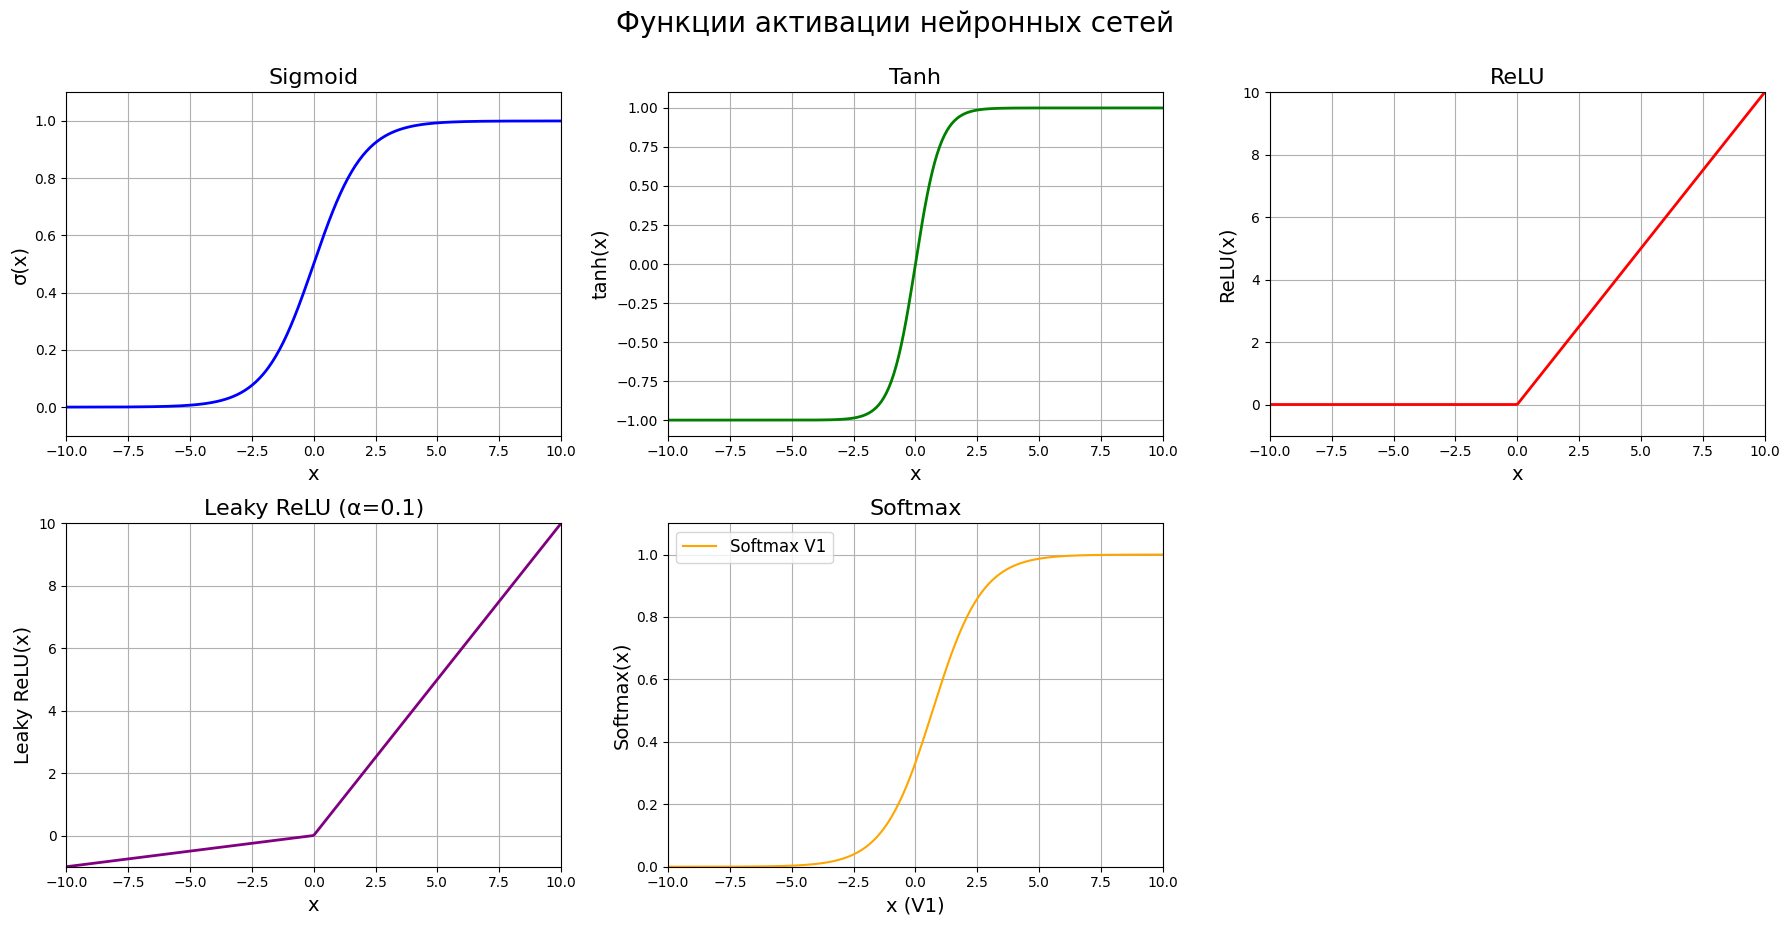

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Определение функций активации
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh_act(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.1):
    return np.maximum(alpha * x, x)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=0))
    return e_x / e_x.sum(axis=0)

def visualize_activation_functions():
    '''
    Визуализирует различные функции активации нейронных сетей.
    '''
    # Диапазон значений для визуализации
    x = np.linspace(-10, 10, 400)

    # Создание фигуры и осей
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle("Функции активации нейронных сетей", fontsize=20, y=0.95)

    # 1. Sigmoid
    axes[0, 0].plot(x, sigmoid(x), color='blue', linewidth=2)
    axes[0, 0].set_title("Sigmoid", fontsize=16)
    axes[0, 0].set_xlabel("x", fontsize=14)
    axes[0, 0].set_ylabel("σ(x)", fontsize=14)
    axes[0, 0].grid(True)
    axes[0, 0].set_xlim([-10, 10])
    axes[0, 0].set_ylim([-0.1, 1.1])

    # 2. Tanh
    axes[0, 1].plot(x, tanh_act(x), color='green', linewidth=2)
    axes[0, 1].set_title("Tanh", fontsize=16)
    axes[0, 1].set_xlabel("x", fontsize=14)
    axes[0, 1].set_ylabel("tanh(x)", fontsize=14)
    axes[0, 1].grid(True)
    axes[0, 1].set_xlim([-10, 10])
    axes[0, 1].set_ylim([-1.1, 1.1])

    # 3. ReLU
    axes[0, 2].plot(x, relu(x), color='red', linewidth=2)
    axes[0, 2].set_title("ReLU", fontsize=16)
    axes[0, 2].set_xlabel("x", fontsize=14)
    axes[0, 2].set_ylabel("ReLU(x)", fontsize=14)
    axes[0, 2].grid(True)
    axes[0, 2].set_xlim([-10, 10])
    axes[0, 2].set_ylim([-1, 10])

    # 4. Leaky ReLU с увеличенным alpha для наглядности
    alpha = 0.1  # Увеличиваем alpha до 0.1 для лучшей визуализации
    axes[1, 0].plot(x, leaky_relu(x, alpha=alpha), color='purple', linewidth=2)
    axes[1, 0].set_title(f"Leaky ReLU (α={alpha})", fontsize=16)
    axes[1, 0].set_xlabel("x", fontsize=14)
    axes[1, 0].set_ylabel(f"Leaky ReLU(x)", fontsize=14)
    axes[1, 0].grid(True)
    axes[1, 0].set_xlim([-10, 10])
    axes[1, 0].set_ylim([-1, 10])

    # 5. Softmax
    # Для визуализации Softmax как линии, будем изменять один элемент вектора, фиксируя остальные
    vectors = [np.array([x_i, 0, 0]) for x_i in x]
    softmax_values = np.array([softmax(vec) for vec in vectors])

    axes[1, 1].plot(x, softmax_values[:, 0], label='Softmax V1', color='orange')
    # Скрываем остальные компоненты для ясности
    # axes[1, 1].plot(x, softmax_values[:, 1], label='Softmax V2', color='cyan')
    # axes[1, 1].plot(x, softmax_values[:, 2], label='Softmax V3', color='magenta')
    axes[1, 1].set_title("Softmax", fontsize=16)
    axes[1, 1].set_xlabel("x (V1)", fontsize=14)
    axes[1, 1].set_ylabel("Softmax(x)", fontsize=14)
    axes[1, 1].legend(fontsize=12)
    axes[1, 1].grid(True)
    axes[1, 1].set_xlim([-10, 10])
    axes[1, 1].set_ylim([0, 1.1])

    # 6. Пустой подграфик
    axes[1, 2].axis('off')  # Отключение пустого подграфика

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Вызов функции для визуализации функций активации
visualize_activation_functions()


In [4]:
# Сверточные нейронные сети LeNet.

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# Определение архитектуры LeNet
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Инициализация модели
model = LeNet()

# Загрузка и подготовка данных
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# Функция обучения модели
def train(model, trainloader, epochs=2):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}")
    print('Finished Training')

train(model, trainloader, epochs=2)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 152MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 54.2MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 47.0MB/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 10.1MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1, Loss: 1.7781388049822118
Epoch 2, Loss: 0.2603549491852395
Finished Training


In [6]:
# самостоятельно сделать предсказание на любой картинке для LeNet

In [ ]:
# Сверточные нейронные сети AlexNet.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 144MB/s]


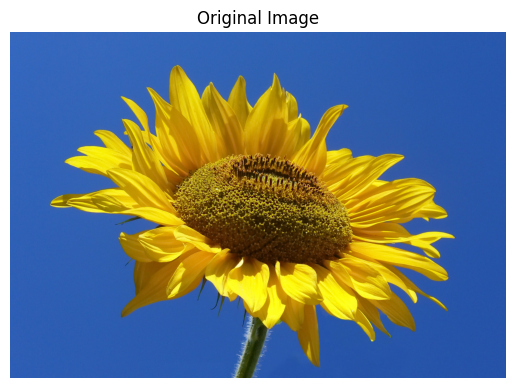

Predicted class: daisy


In [7]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import requests

# Загрузка предварительно обученной модели AlexNet
model = models.alexnet(pretrained=True)
model.eval()

# Функция для предобработки изображения
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(image_path)
    image_tensor = transform(image).unsqueeze(0)
    return image, image_tensor

# Функция для скачивания изображения из интернета
def download_image(url, filename):
    urlretrieve(url, filename)

# Функция для отображения изображения
def show_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Функция для получения названия класса по индексу из ImageNet
def get_class_name(class_index):
    labels_url = 'https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json'
    response = requests.get(labels_url)
    if response.status_code == 200:
        labels = response.json()
        return labels[class_index]
    else:
        return "Class name not found"

# Предсказание класса для изображения
def predict(model, image_tensor):
    with torch.no_grad():
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs, 1)
    class_index = predicted.item()
    return get_class_name(class_index)

# Скачивание и предобработка изображения
image_url = "https://upload.wikimedia.org/wikipedia/commons/4/41/Sunflower_from_Silesia2.jpg"
image_path = "test_image.jpg"
download_image(image_url, image_path)
original_image, image_tensor = preprocess_image(image_path)

# Отображение исходного изображения
show_image(original_image, 'Original Image')

# Получение и вывод предсказания
prediction = predict(model, image_tensor)
print("Predicted class:", prediction)

In [8]:
# CNN на примере yolov5

In [ ]:
# https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb#scrollTo=1NcFxRcFdJ_O
# репозиторий: https://github.com/ultralytics/yolov5/blob/master/README.md
# данные https://cocodataset.org/#home
#